In [1]:
import shutil
import glob
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.backend import count_params
from sklearn.metrics import confusion_matrix
import itertools
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
cat_dog_directory = '/home/prasojo/belajar/belajar_python/cat_dog_data/train'
belajar_data_directory ='/home/prasojo/belajar/belajar_python/BelajarData'

In [30]:
# os.chdir(cat_dog_directory)
# if os.path.isdir('train/dog') is False:
#     os.makedirs('train/dog')
#     os.makedirs('train/cat')
#     os.makedirs('valid/dog')
#     os.makedirs('valid/cat')
#     os.makedirs('test/dog')
#     os.makedirs('test/cat')
    
#     for c in random.sample(glob.glob('cat*'),500):
#         shutil.move(c,'train/cat')
    
#     for c in random.sample(glob.glob('dog*'),500):
#         shutil.move(c,'train/dog')
        
#     for c in random.sample(glob.glob('cat*'),100):
#         shutil.move(c,'valid/cat')
        
#     for c in random.sample(glob.glob('dog*'),100):
#         shutil.move(c,'valid/dog')
        
#     for c in random.sample(glob.glob('cat*'),50):
#         shutil.move(c,'test/cat')
        
#     for c in random.sample(glob.glob('dog*'),50):
#         shutil.move(c,'test/dog')

# os.chdir(belajar_data_directory)
    

In [3]:
train_path = os.path.join(cat_dog_directory,'train')
valid_path = os.path.join(cat_dog_directory,'valid')
test_path = os.path.join(cat_dog_directory,'test')

In [4]:
train_batches = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    directory=train_path,
    target_size=(224,224),
    classes=['cat','dog'],
    batch_size=100
)

valid_batches = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    directory=valid_path,
    target_size=(224,224),
    classes=['cat','dog'],
    batch_size=100
)

test_batches = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    directory=test_path,
    target_size=(224,224),
    classes=['cat','dog'],
    batch_size=100,
    shuffle=False
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [33]:
imgs, labels = next(train_batches)

In [34]:
def plot_images(image_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

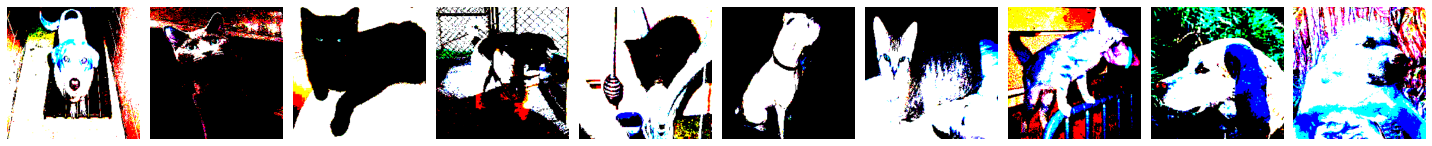

In [21]:
plot_images(imgs)

In [23]:
print(labels[:10])

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [36]:
model = Sequential([
    Conv2D(
        filters=32,
        kernel_size=(3,3),
        activation='relu',
        padding='same',
        input_shape=(224,224,3)
    ),
    MaxPool2D(
        pool_size=(2,2),
        strides=2
    ),
    Conv2D(
        filters=64,
        kernel_size=(3,3),
        activation='relu',
        padding='same'
    ),
    MaxPool2D(
        pool_size=(2,2),
        strides=2
    ),
    Flatten(),
    Dense(
        units=2, activation='softmax'
    ),
])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [38]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
model.fit(x=train_batches, validation_data= valid_batches, epochs=50, verbose=2)

Epoch 1/50
10/10 - 47s - loss: 54.2048 - accuracy: 0.5100 - val_loss: 43.3660 - val_accuracy: 0.5000
Epoch 2/50
10/10 - 46s - loss: 20.0767 - accuracy: 0.5280 - val_loss: 14.7254 - val_accuracy: 0.5450
Epoch 3/50
10/10 - 46s - loss: 7.5378 - accuracy: 0.6230 - val_loss: 6.8586 - val_accuracy: 0.5900
Epoch 4/50
10/10 - 46s - loss: 4.7810 - accuracy: 0.6480 - val_loss: 2.9852 - val_accuracy: 0.6500
Epoch 5/50
10/10 - 46s - loss: 3.0726 - accuracy: 0.7030 - val_loss: 3.6015 - val_accuracy: 0.6100
Epoch 6/50
10/10 - 46s - loss: 1.2401 - accuracy: 0.7980 - val_loss: 2.3855 - val_accuracy: 0.6300
Epoch 7/50
10/10 - 45s - loss: 0.6291 - accuracy: 0.8580 - val_loss: 2.2267 - val_accuracy: 0.6200
Epoch 8/50
10/10 - 45s - loss: 0.4209 - accuracy: 0.8830 - val_loss: 2.2858 - val_accuracy: 0.6550
Epoch 9/50
10/10 - 44s - loss: 0.2518 - accuracy: 0.9220 - val_loss: 2.2171 - val_accuracy: 0.6600
Epoch 10/50
10/10 - 45s - loss: 0.0857 - accuracy: 0.9660 - val_loss: 2.2668 - val_accuracy: 0.6300
Epoch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

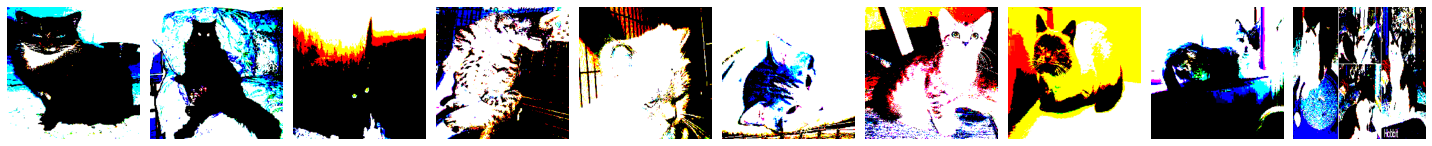

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [40]:
test_imgs, test_labels = next(test_batches)
plot_images(test_imgs)
print(test_labels)

In [41]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
predictions = model.predict(x=test_batches,verbose=0)

In [47]:
predictions = np.round(predictions)

In [48]:
predictions[:20]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [50]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title='confusion_matrix',
    cmap=plt.cm.Blues
):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalize confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color='white' if cm[i,j]> thresh else 'black'
                )
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
cm = confusion_matrix(
    y_true=test_batches.classes, 
    y_pred=np.argmax(predictions, axis=-1))

In [51]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix without normalization
[[34 16]
 [13 37]]


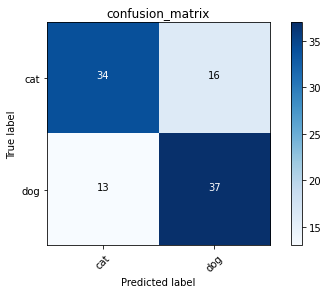

In [52]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

In [54]:
vgg16_model = vgg16.VGG16()

553467904/553467096 [==============================] - 611s 1us/step


In [84]:
if os.path.isfile('./model/vgg16_model.h5') is False:
    vgg16_model.save('./model/vgg16_model.h5')

In [55]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [61]:
model_v16 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model_v16.add(layer)

In [62]:
model_v16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [68]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [73]:
for x in model_v16.layers:
    x.trainable = False

In [74]:
model_v16.add(Dense(units = 2, activation='softmax'))

In [75]:
model_v16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [76]:
model_v16.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [78]:
model_v16.fit(
    x=train_batches,
    validation_data=valid_batches,
    epochs=5,
    verbose=2
)

Epoch 1/5
10/10 - 346s - loss: 0.3987 - accuracy: 0.8260 - val_loss: 0.2735 - val_accuracy: 0.8800
Epoch 2/5
10/10 - 351s - loss: 0.2223 - accuracy: 0.9120 - val_loss: 0.1761 - val_accuracy: 0.9250
Epoch 3/5
10/10 - 345s - loss: 0.1436 - accuracy: 0.9460 - val_loss: 0.1365 - val_accuracy: 0.9500
Epoch 4/5
10/10 - 346s - loss: 0.1070 - accuracy: 0.9630 - val_loss: 0.1177 - val_accuracy: 0.9550
Epoch 5/5
10/10 - 339s - loss: 0.0869 - accuracy: 0.9680 - val_loss: 0.1087 - val_accuracy: 0.9600


In [79]:
predictions = model_v16.predict(x=test_batches, verbose=0)

In [80]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [81]:
cm = confusion_matrix(
    y_true=test_batches.classes, 
    y_pred=np.argmax(predictions, axis=-1)
)

In [82]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix without normalization
[[47  3]
 [ 3 47]]


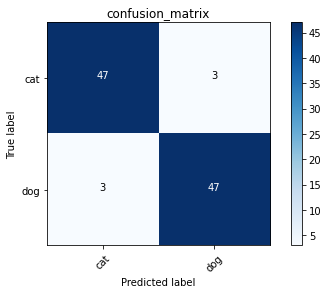

In [83]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)